# Model Training

In [2]:
%load_ext autoreload
%autoreload 2

import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import wandb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


True

## Parameters

In [4]:
# change this accordingly
project_path = "/home/brina/nus-mcomp/sem3/cs4248-natural-language-processing/Project/CS4248-NLP-Project"

save_path = f"{project_path}/scicite_preprocessed"
dataset = "selected-features-rfe"
project_name = "model-comparison"

## 1. Load dataset

In [5]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

## 2. Train-validation split

In [6]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

In [9]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
selector = RFE(model, n_features_to_select=100)
selector = selector.fit(X_train, y_train)

# Make predictions
y_pred = selector.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="logistic-regression")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression")
wandb.finish()

/home/brina/miniconda3/envs/nlp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/brina/miniconda3/envs/nlp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

KeyboardInterrupt: 

## 4. Train Random Forest Classifier

Fitting estimator with 5016 features.
Fitting estimator with 4916 features.
Fitting estimator with 4816 features.
Fitting estimator with 4716 features.
Fitting estimator with 4616 features.
Fitting estimator with 4516 features.
Fitting estimator with 4416 features.
Fitting estimator with 4316 features.
Fitting estimator with 4216 features.
Fitting estimator with 4116 features.
Fitting estimator with 4016 features.
Fitting estimator with 3916 features.
Fitting estimator with 3816 features.
Fitting estimator with 3716 features.
Fitting estimator with 3616 features.
Fitting estimator with 3516 features.
Fitting estimator with 3416 features.
Fitting estimator with 3316 features.
Fitting estimator with 3216 features.
Fitting estimator with 3116 features.
Fitting estimator with 3016 features.
Fitting estimator with 2916 features.
Fitting estimator with 2816 features.
Fitting estimator with 2716 features.
Fitting estimator with 2616 features.
Fitting estimator with 2516 features.
Fitting esti

wandb: Currently logged in as: brinashong to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Random Forest Classifier
-----Evaluation-----
Accuracy: 0.7971
Macro F1-score: 0.7733
Micro F1-score: 0.7971


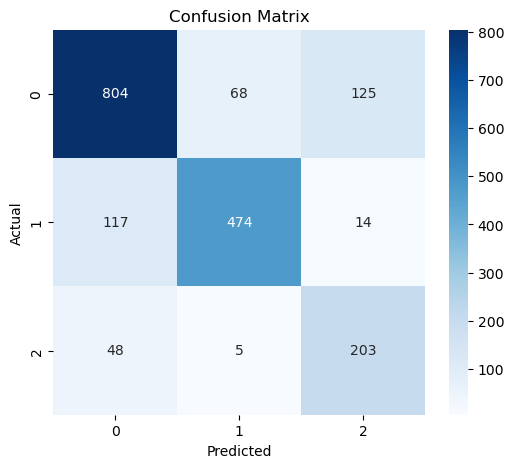

Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.79709
Macro F1-score,0.77325
Micro F1-score,0.79709


In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector = RFE(rf_model, n_features_to_select=100, verbose=1, step=100)
rf_selector = rf_selector.fit(X_train, y_train)

y_pred_rf = rf_selector.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="random-forest-classifier")
common.evaluate(y_test, y_pred_rf, label_encoder, "Random Forest Classifier")
wandb.finish()

## 5. Train Support Vector Machine (SVM)

Support Vector Machine (SVM)
-----Evaluation-----
Accuracy: 0.7804
Macro F1-score: 0.7496
Micro F1-score: 0.7804


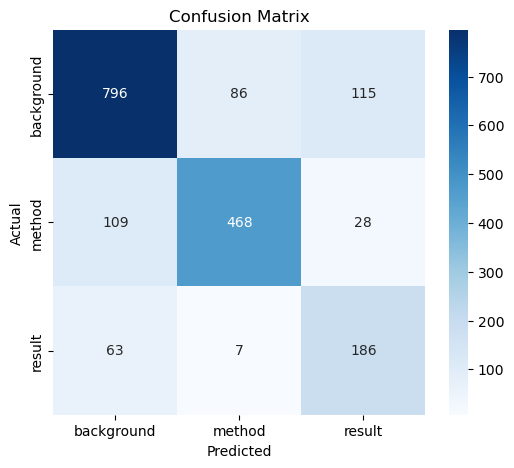

Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.78041
Macro F1-score,0.74961
Micro F1-score,0.78041


In [8]:
svm_model = SVC(kernel='linear')
svm_selector = RFE(svm_model, n_features_to_select=100)
svm_selector = svm_selector.fit(X_train, y_train)

y_pred_svm = svm_selector.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="support-vector-machine")
common.evaluate(y_test, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")
wandb.finish()